In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [2]:
# Step 1: Load raw hospital data
df_raw = pd.read_csv(r"C:\Users\DELL\Downloads\hospital_data_analysis.csv")
print(df_raw.sample(3))


     Patient_ID  Age  Gender              Condition             Procedure  \
825         839   50    Male          Kidney Stones           Lithotripsy   
290         296   52  Female  Respiratory Infection  Antibiotics and Rest   
321         327   67    Male        Prostate Cancer     Radiation Therapy   

      Cost  Length_of_Stay Readmission    Outcome  Satisfaction  
825   6000              59          No  Recovered             3  
290    800              21          No     Stable             4  
321  20000              30          No  Recovered             3  


In [3]:
df = df_raw.copy()
print(df.shape)

(984, 10)


In [4]:
#Step 2: Inspect data types- Incorrect dtypes cause downstream calculation and plotting errors.
print(df.dtypes)


Patient_ID         int64
Age                int64
Gender            object
Condition         object
Procedure         object
Cost               int64
Length_of_Stay     int64
Readmission       object
Outcome           object
Satisfaction       int64
dtype: object


In [5]:
df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


In [6]:
# Step 3: Check missing values
df.isna().mean().sort_values(ascending=False).head()


Patient_ID    0.0
Age           0.0
Gender        0.0
Condition     0.0
Procedure     0.0
dtype: float64

In [7]:
df = df.copy()




In [8]:
df.isna().sum()


Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
dtype: int64

In [9]:
# Step 4: Duplicate record detection
df.duplicated().sum()


np.int64(0)

In [10]:
df = df.copy()


In [11]:
df = df.copy()
df.shape


(984, 10)

In [12]:
# Step 5: Memory usage
df.memory_usage(deep=True)


Index               132
Patient_ID         7872
Age                7872
Gender            53200
Condition         60343
Procedure         68221
Cost               7872
Length_of_Stay     7872
Readmission       50448
Outcome           55893
Satisfaction       7872
dtype: int64

In [13]:
df = df.copy()
df.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 319.9 KB


In [14]:
print("Shape:", df.shape)
print("Missing %:", df.isna().mean().mean()*100)
print("Duplicates:", df.duplicated().sum())


Shape: (984, 10)
Missing %: 0.0
Duplicates: 0


In [15]:
# Column Name Standardization-Enables safe SQL-style querying and modeling.
# Step 6
df = df.copy()
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-z0-9_]", "", regex=True)
)
print(df.columns)


Index(['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost',
       'length_of_stay', 'readmission', 'outcome', 'satisfaction'],
      dtype='object')


In [16]:
# Strip whitespace from column names
# Extra spaces break column access and cause silent bugs in hospital analytics pipelines
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [17]:
df = df.copy()
df.columns = df.columns.str.strip()


In [18]:
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [19]:
#Step 7: Convert column names to lowercase
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [20]:
df = df.copy()
df.columns = df.columns.str.lower()


In [21]:
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [22]:
# Step 8: Replace spaces with underscores-Snake_case column names are Python-friendly and modeling-ready
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [23]:
df = df.copy()
df.columns = df.columns.str.replace(" ", "_")


In [24]:
# Enables clean feature engineering later
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [25]:
#Step 9: Remove special characters from column names
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [26]:
df = df.copy()
df.columns = df.columns.str.replace(r"[^a-z0-9_]", "", regex=True)


In [27]:
df = df.copy()
df.columns = df.columns.str.lower()

In [28]:
print(df.columns.tolist())

['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [29]:
df = df.copy()
df.columns = df.columns.str.lower()

In [30]:
print(df.columns.tolist())


['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [31]:
df = df.copy()
df.columns = df.columns.str.replace(r"[^a-z0-9_]", "", regex=True)

In [32]:
print(df.columns.tolist())

['patient_id', 'age', 'gender', 'condition', 'procedure', 'cost', 'length_of_stay', 'readmission', 'outcome', 'satisfaction']


In [33]:
# Step 10: Verify standardized column schema
#Confirms schema stability before patient-level cleaning.
df.head(3)


,patient_id,age,gender,condition,procedure,cost,length_of_stay,readmission,outcome,satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      984 non-null    int64 
 1   age             984 non-null    int64 
 2   gender          984 non-null    object
 3   condition       984 non-null    object
 4   procedure       984 non-null    object
 5   cost            984 non-null    int64 
 6   length_of_stay  984 non-null    int64 
 7   readmission     984 non-null    object
 8   outcome         984 non-null    object
 9   satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


In [35]:
print(df.shape)
print("Missing %:", df.isna().mean().mean()*100)
print("Duplicates:", df.duplicated().sum())


(984, 10)
Missing %: 0.0
Duplicates: 0


In [36]:
# Step 11: Identify duplicate Patient IDs
df["patient_id"].duplicated().sum()


np.int64(0)

In [37]:
# Step 12: Remove duplicate Patient IDs- Each patient record must represent a unique encounter

df = df.copy()
df = df.drop_duplicates(subset="patient_id")


In [38]:
df.shape


(984, 10)

In [39]:
df = df.copy()
df = df.loc[df["patient_id"].notna()]


In [40]:
df["patient_id"].isna().sum()


np.int64(0)

In [41]:
# Step 14: Ensure Patient ID is numeric- Non-numeric IDs cause join and indexing failures.
df["patient_id"].head(3)


0    1
1    2
2    3
Name: patient_id, dtype: int64

In [42]:
df = df.copy()
df = df.loc[df["patient_id"].astype(str).str.isnumeric()]


In [43]:
df["patient_id"].head(3)


0    1
1    2
2    3
Name: patient_id, dtype: int64

In [44]:
# Step 15: Reset index after PatientID cleanup-Resets row order after filtering operations.- Maintains orderly dataset.
df.index[:5]


Index([0, 1, 2, 3, 4], dtype='int64')

In [45]:
df = df.copy()
df.reset_index(drop=True, inplace=True)


In [46]:
df.index[:5]

RangeIndex(start=0, stop=5, step=1)

In [47]:
# Step 16: Inspect raw Age values- Explanation: Age drives clinical risk, billing, and outcomes.
df["age"].sample(3)



183    45
121    70
852    67
Name: age, dtype: int64

In [48]:
df["age"].describe()


count    984.000000
mean      53.754065
std       14.941135
min       25.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       78.000000
Name: age, dtype: float64

In [49]:
# Step 17: Convert Age to numeric- String ages break statistical analysis- Enables numerical operations.- Applies medical domain rules.
df["age"].dtype



dtype('int64')

In [50]:
df = df.copy()
df["age"] = pd.to_numeric(df["age"], errors="coerce")

In [51]:
df["age"].dtype


dtype('int64')

In [52]:
# Step 18: Identify negative ages
(df["age"] < 0).sum()


np.int64(0)

In [53]:
df = df.copy()
df.loc[df["age"] < 0, "age"] = np.nan


In [54]:
# Step 19: Identify ages > 120
(df["age"] > 12).sum()


np.int64(984)

In [55]:
df = df.copy()
df.loc[df["age"] > 120, "age"] = np.nan

In [56]:
# Step 20: Compute IQR for Age- Defines age outlier threshold.
df["age"].describe()


count    984.000000
mean      53.754065
std       14.941135
min       25.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       78.000000
Name: age, dtype: float64

In [57]:
q1, q3 = df["age"].quantile([0.25, 0.75])
iqr = q3 - q1
upper = q3 + 1.5 * iqr


In [58]:
df[df["age"] > upper]


,patient_id,age,gender,condition,procedure,cost,length_of_stay,readmission,outcome,satisfaction


In [59]:
# Step 21: Remove IQR-based age outliers
(df["age"] > upper).sum()


np.int64(0)

In [60]:
df = df.copy()
df.loc[df["age"] > upper, "age"] = np.nan


In [61]:
# Step 22: Check missing age values
df["age"].isna().sum()


np.int64(0)

In [62]:
#Step 23: Impute Age with median-Median preserves population distribution
df = df.copy()
df["age"] = df["age"].fillna(df["age"].median())



In [63]:
df["age"].isna().sum()


np.int64(0)

In [64]:
# Step 24: Validate Age range post-cleaning
df["age"].min(), df["age"].max()


(25.0, 78.0)

In [65]:
df["age"].describe()


count    984.000000
mean      53.754065
std       14.941135
min       25.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       78.000000
Name: age, dtype: float64

In [66]:
# Step 25: Sample cleaned Age values
df["age"].sample(3)


394    52.0
221    65.0
929    65.0
Name: age, dtype: float64

In [67]:
print(df.shape)
print("Missing %:", df.isna().mean().mean()*100)
print("Duplicates:", df.duplicated().sum())


(984, 10)
Missing %: 0.0
Duplicates: 0


In [68]:
# Step 26: Inspect Gender values-: Gender impacts outcomes and cost patterns.
df["gender"].value_counts().head()


gender
Female    524
Male      460
Name: count, dtype: int64

In [69]:
# Step 27: Normalize Gender text
df["gender"].sample(3)


532      Male
548    Female
636      Male
Name: gender, dtype: object

In [70]:
df = df.copy()
df["gender"] = df["gender"].str.strip().str.upper()


In [71]:
df["gender"].value_counts()


gender
FEMALE    524
MALE      460
Name: count, dtype: int64

In [72]:
# Step 28: Map gender variants
df["gender"].value_counts()


gender
FEMALE    524
MALE      460
Name: count, dtype: int64

In [73]:
df = df.copy()
df["gender"] = df["gender"].replace({
    "MALE": "M",
    "FEMALE": "F",
    "UNKNOWN": "OTHER"
})


In [74]:
df["gender"].value_counts()


gender
F    524
M    460
Name: count, dtype: int64

In [75]:
#Step 29: Handle missing Gender
df["gender"].isna().sum()


np.int64(0)

In [76]:
df = df.copy()
df["gender"] = df["gender"].fillna("OTHER")


In [77]:
df["gender"].isna().sum()


np.int64(0)

In [78]:
# Step 30: Validate Gender categories - Ensures limited, controlled categories.
df["gender"].unique()

    

array(['F', 'M'], dtype=object)

In [79]:
df["gender"].value_counts()


gender
F    524
M    460
Name: count, dtype: int64

In [80]:
#Inspect raw Condition values
print(df["condition"].value_counts().head())

condition
Fractured Leg    67
Heart Attack     67
Fractured Arm    66
Hypertension     66
Appendicitis     66
Name: count, dtype: int64


In [81]:
# Step 32: Strip whitespace from Condition
df["condition"].sample(3)


441     Kidney Stones
398    Osteoarthritis
338     Kidney Stones
Name: condition, dtype: object

In [82]:
df = df.copy()
df["condition"] = df["condition"].astype(str).str.strip()


In [83]:
df["condition"].sample(3)

411        Kidney Stones
308        Kidney Stones
68     Allergic Reaction
Name: condition, dtype: object

In [84]:
# Step 33: Standardize Condition casing
df["condition"].value_counts().head()


condition
Fractured Leg    67
Heart Attack     67
Fractured Arm    66
Hypertension     66
Appendicitis     66
Name: count, dtype: int64

In [85]:
df = df.copy()
df["condition"] = df["condition"].str.title()


In [86]:
df["condition"].value_counts().head()

condition
Fractured Leg    67
Heart Attack     67
Fractured Arm    66
Hypertension     66
Appendicitis     66
Name: count, dtype: int64

In [87]:
# Step 34: Remove invalid Condition placeholders- Placeholder values like “Unknown” or “Nan” degrade analysis quality.
df["condition"].value_counts().head()



condition
Fractured Leg    67
Heart Attack     67
Fractured Arm    66
Hypertension     66
Appendicitis     66
Name: count, dtype: int64

In [88]:
df = df.copy()
df.loc[df["condition"].isin(["Nan", "None", "Unknown", ""]), "condition"] = np.nan


In [89]:
df["condition"].isna().sum()


np.int64(0)

In [90]:
#Step 35: Impute missing Condition with mode
df["condition"].isna().sum()


np.int64(0)

In [91]:
df = df.copy()
df["condition"] = df["condition"].fillna(df["condition"].mode()[0])


In [92]:
df["condition"].isna().sum()


np.int64(0)

In [93]:
# Step 36: Inspect raw Procedure values
df = df.copy()
print(df["procedure"].sample(5).tolist())


['Medication and Counseling', 'Appendectomy', 'Radiation Therapy', 'Radiation Therapy', 'Radiation Therapy']


In [94]:
# Step 37: Strip whitespace from Procedure
df = df.copy()
df["procedure"] = df["procedure"].astype(str).str.strip()


In [95]:
df["procedure"]

0                    Angioplasty
1                Insulin Therapy
2               X-Ray and Splint
3         CT Scan and Medication
4       Surgery and Chemotherapy
                 ...            
979    Medication and Counseling
980                 Appendectomy
981    Cast and Physical Therapy
982      Cardiac Catheterization
983        Epinephrine Injection
Name: procedure, Length: 984, dtype: object

In [96]:
df = df.copy()
df["procedure"] = df["procedure"].astype(str).str.strip()


In [97]:
df["procedure"].sample(3)

256    Medication and Counseling
287                 Appendectomy
920    Medication and Counseling
Name: procedure, dtype: object

In [98]:
#Step 37: Strip whitespace from Procedure
df = df.copy()
df["procedure"] = df["procedure"].astype(str).str.strip()


In [99]:
# Step 38: Standardize Procedure casing- Ensures correct cost aggregation per procedure.
df = df.copy()
df["procedure"] = df["procedure"].str.title()


In [100]:
# Step 39: Remove invalid Procedure values- Flags missing procedure data.

df = df.copy()
df.loc[df["procedure"].isin(["Nan", "None", "Unknown", ""]), "procedure"] = np.nan


In [101]:
# Step 40: Impute missing Procedure
df = df.copy()
df["procedure"] = df["procedure"].fillna(df["procedure"].mode()[0])


In [102]:
# Step 41: Inspect Outcome- Inconsistent outcome labels
df = df.copy()
print(df["outcome"].sample(5).tolist())



['Stable', 'Stable', 'Recovered', 'Recovered', 'Recovered']


In [103]:
print(df["outcome"])

0      Recovered
1         Stable
2      Recovered
3         Stable
4      Recovered
         ...    
979       Stable
980    Recovered
981    Recovered
982       Stable
983    Recovered
Name: outcome, Length: 984, dtype: object


In [104]:
# Step 42: Standardize Outcome text
df = df.copy()
df["outcome"] = df["outcome"].astype(str).str.strip().str.title()

In [105]:
#Step 43: Clean Readmission values- Accurate readmission rate calculation
df = df.copy()
df["readmission"] = (
    df["readmission"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({"Y": "Yes", "N": "No"})
)


In [106]:
df["readmission"]

0       No
1      Yes
2       No
3      Yes
4       No
      ... 
979     No
980     No
981     No
982    Yes
983     No
Name: readmission, Length: 984, dtype: object

In [107]:
# Step 44: Clean Satisfaction values
df = df.copy()
df["satisfaction"] = df["satisfaction"].astype(str).str.strip().str.title()


In [108]:
df["satisfaction"]

0      4
1      3
2      5
3      2
4      4
      ..
979    4
980    3
981    4
982    2
983    5
Name: satisfaction, Length: 984, dtype: object

In [109]:
# Step 45: Mode imputation for remaining categorical nulls
df = df.copy()
for col in ["outcome", "readmission", "satisfaction"]:
    df[col] = df[col].fillna(df[col].mode()[0])



In [110]:
print("Shape:", df.shape)
print("Missing %:", df.isna().mean().mean()*100)
print("Duplicates:", df.duplicated().sum())


Shape: (984, 10)
Missing %: 0.0
Duplicates: 0


In [111]:
# Step 47: Convert Cost to numeric- Enables accurate cost calculations.
df = df.copy()
df["cost"] = pd.to_numeric(df["cost"], errors="coerce")


In [112]:
# Step 48: Handle negative and zero Cost values- Prevents under-reporting of revenue.
df = df.copy()
df.loc[df["cost"] <= 0, "cost"] = np.nan


In [113]:
#Step 51: Binary encode Readmission
df = df.copy()
df["readmission_flag"] = df["readmission"].map({"Yes": 1, "No": 0})


In [114]:
df["readmission_flag"]

0      0
1      1
2      0
3      1
4      0
      ..
979    0
980    0
981    0
982    1
983    0
Name: readmission_flag, Length: 984, dtype: int64

In [115]:
# Step 52: Binary encode Outcome- Outcome encoding supports survival and recovery analysis
df = df.copy()
df["outcome_flag"] = df["outcome"].map({"Recovered": 1, "Stable": 0})


In [116]:
print(df["outcome_flag"])

0      1
1      0
2      1
3      0
4      1
      ..
979    0
980    1
981    1
982    0
983    1
Name: outcome_flag, Length: 984, dtype: int64


In [117]:
# Step 53: Create Age bins- Age segmentation helps identify high-risk populations.
df = df.copy()
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 30, 50, 70, 120],
    labels=["<30", "30-50", "50-70", "70+"]
)



In [118]:
# Step 55: Create Cost quantiles- Cost tiers identify high-spend patients.-Enables financial stratification.
df = df.copy()
df["cost_tier"] = pd.qcut(df["cost"], q=3, labels=["Low", "Medium", "High"])



In [119]:
print(df["cost_tier"])

0        High
1         Low
2         Low
3      Medium
4        High
        ...  
979       Low
980    Medium
981    Medium
982      High
983       Low
Name: cost_tier, Length: 984, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [120]:
# Step 56: Validate Cost tiers
df["cost_tier"].value_counts()


cost_tier
Low       328
Medium    328
High      328
Name: count, dtype: int64

In [121]:
df["cost_tier"].value_counts(normalize=True)


cost_tier
Low       0.333333
Medium    0.333333
High      0.333333
Name: proportion, dtype: float64

In [122]:
print(df.shape)
print("Missing %:", df.isna().mean().mean()*100)


(984, 14)
Missing %: 0.0


In [123]:
df.isna().sum()

patient_id          0
age                 0
gender              0
condition           0
procedure           0
cost                0
length_of_stay      0
readmission         0
outcome             0
satisfaction        0
readmission_flag    0
outcome_flag        0
age_group           0
cost_tier           0
dtype: int64

In [124]:
df.duplicated().sum()

np.int64(0)

In [125]:
df.describe()

,patient_id,age,cost,length_of_stay,readmission_flag,outcome_flag
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,500.329268,53.754065,8367.479675,37.663618,0.268293,0.600610
std,288.979531,14.941135,7761.990976,19.595805,0.443296,0.490022
min,1.000000,25.000000,100.000000,1.000000,0.000000,0.000000
25%,250.750000,45.000000,1000.000000,21.000000,0.000000,0.000000
50%,500.500000,55.000000,6000.000000,38.000000,0.000000,1.000000
75%,750.250000,65.000000,15000.000000,54.250000,1.000000,1.000000
max,1000.000000,78.000000,25000.000000,76.000000,1.000000,1.000000


In [126]:
#Step 61: Inspect Gender values before encoding- Gender must be numeric for modeling and correlation analysis

df = df.copy()
print(df["gender"].value_counts())


gender
F    524
M    460
Name: count, dtype: int64


In [128]:
# Step 62: Encode Gender numerically- Numerical encoding enables regression and ML models
df = df.copy()
df["gender_flag"] = df["gender"].map({"M": 1, "F": 0, "OTHER": -1})



In [129]:
df["gender_flag"]

0      0
1      1
2      0
3      1
4      0
      ..
979    1
980    0
981    1
982    0
983    1
Name: gender_flag, Length: 984, dtype: int64

In [130]:
# Step 63: Validate Gender encoding-Ensures no missing mappings occurred
df["gender_flag"].isna().sum()


np.int64(0)

In [131]:
df["gender_flag"].value_counts()


gender_flag
0    524
1    460
Name: count, dtype: int64

In [132]:
# Step 64: Inspect Condition categories- Conditions are categorical and must be expanded for models.
df = df.copy()
print(df["condition"].value_counts().head())



condition
Fractured Leg    67
Heart Attack     67
Fractured Arm    66
Hypertension     66
Appendicitis     66
Name: count, dtype: int64


In [137]:
# Step 65: One-hot encode Condition- One-hot encoding avoids ordinal bias in diagnosis data.- Allows condition-specific risk modeling

df = df.copy()
condition_dummies = pd.get_dummies(df["condition"], prefix="cond")
df = pd.concat([df, condition_dummies], axis=1)


In [139]:
print(df.head())

   patient_id   age gender      condition                 procedure     cost  \
0           1  45.0      F  Heart Disease               Angioplasty  15000.0   
1           2  60.0      M       Diabetes           Insulin Therapy   2000.0   
2           3  32.0      F  Fractured Arm          X-Ray And Splint    500.0   
3           4  75.0      M         Stroke    Ct Scan And Medication  10000.0   
4           5  50.0      F         Cancer  Surgery And Chemotherapy  25000.0   

   length_of_stay readmission    outcome satisfaction  readmission_flag  \
0               5          No  Recovered            4                 0   
1               3         Yes     Stable            3                 1   
2               1          No  Recovered            5                 0   
3               7         Yes     Stable            2                 1   
4              10          No  Recovered            4                 0   

   outcome_flag age_group cost_tier  gender_flag  cond_Allergic Reac

In [140]:
# Drop original categorical columns- Prevents duplicate information and multicollinearity.
df[["condition", "procedure"]].head(3)



,condition,procedure
0,Heart Disease,Angioplasty
1,Diabetes,Insulin Therapy
2,Fractured Arm,X-Ray And Splint


In [141]:
df = df.copy()
df.drop(columns=["condition", "procedure"], inplace=True)


In [142]:
df.filter(like="cond_").head(3)


,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [143]:
# Step 68: Inspect numeric correlation matrix- Highly correlated features destabilize models.
df.select_dtypes("number").corr()


,patient_id,age,cost,length_of_stay,readmission_flag,outcome_flag,gender_flag
patient_id,1.000000,-0.002935,-0.004168,0.989917,-0.001476,0.000764,-0.000673
age,-0.002935,1.000000,0.303816,0.075080,0.228841,-0.694406,0.132456
cost,-0.004168,0.303816,1.000000,0.114206,0.412281,0.245640,-0.287602
length_of_stay,0.989917,0.075080,0.114206,1.000000,0.046704,0.002839,-0.002835
readmission_flag,-0.001476,0.228841,0.412281,0.046704,1.000000,0.020789,-0.411046
outcome_flag,0.000764,-0.694406,0.245640,0.002839,0.020789,1.000000,-0.055230
gender_flag,-0.000673,0.132456,-0.287602,-0.002835,-0.411046,-0.055230,1.000000


In [146]:
# Use actual column names from your cleaned dataset
available_cols = ['cost', 'length_of_stay']  # Adjust based on print(df.columns)
corr_matrix = df[available_cols].corr()
print("Correlation matrix:")
print(corr_matrix)


Correlation matrix:
                    cost  length_of_stay
cost            1.000000        0.114206
length_of_stay  0.114206        1.000000


In [148]:
df = df.copy()
df.drop(columns=["cost"], inplace=True)


In [150]:
# Identify numeric features for scaling
df.select_dtypes("number").columns.tolist()


['patient_id',
 'age',
 'length_of_stay',
 'readmission_flag',
 'outcome_flag',
 'gender_flag']

In [151]:
num_features = ["age", "lengthofstay", "cost_per_day"]


In [152]:
df.select_dtypes("number").columns.tolist()


['patient_id',
 'age',
 'length_of_stay',
 'readmission_flag',
 'outcome_flag',
 'gender_flag']

In [159]:
df

,patient_id,age,gender,length_of_stay,readmission,outcome,satisfaction,readmission_flag,outcome_flag,age_group,cost_tier,gender_flag,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke
0,1,45.0,F,5,No,Recovered,4,0,1,30-50,High,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,2,60.0,M,3,Yes,Stable,3,1,0,50-70,Low,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,3,32.0,F,1,No,Recovered,5,0,1,30-50,Low,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,4,75.0,M,7,Yes,Stable,2,1,0,70+,Medium,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,50.0,F,10,No,Recovered,4,0,1,30-50,High,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,996,68.0,M,70,No,Stable,4,0,0,50-70,Low,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
980,997,45.0,F,72,No,Recovered,3,0,1,30-50,Medium,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
981,998,40.0,M,72,No,Recovered,4,0,1,30-50,Medium,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
982,999,78.0,F,74,Yes,Stable,2,1,0,70+,High,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Fal

In [160]:
df.columns.tolist()


['patient_id',
 'age',
 'gender',
 'length_of_stay',
 'readmission',
 'outcome',
 'satisfaction',
 'readmission_flag',
 'outcome_flag',
 'age_group',
 'cost_tier',
 'gender_flag',
 'cond_Allergic Reaction',
 'cond_Appendicitis',
 'cond_Cancer',
 'cond_Childbirth',
 'cond_Diabetes',
 'cond_Fractured Arm',
 'cond_Fractured Leg',
 'cond_Heart Attack',
 'cond_Heart Disease',
 'cond_Hypertension',
 'cond_Kidney Stones',
 'cond_Osteoarthritis',
 'cond_Prostate Cancer',
 'cond_Respiratory Infection',
 'cond_Stroke',
 'cond_Allergic Reaction',
 'cond_Appendicitis',
 'cond_Cancer',
 'cond_Childbirth',
 'cond_Diabetes',
 'cond_Fractured Arm',
 'cond_Fractured Leg',
 'cond_Heart Attack',
 'cond_Heart Disease',
 'cond_Hypertension',
 'cond_Kidney Stones',
 'cond_Osteoarthritis',
 'cond_Prostate Cancer',
 'cond_Respiratory Infection',
 'cond_Stroke',
 'cond_Allergic Reaction',
 'cond_Appendicitis',
 'cond_Cancer',
 'cond_Childbirth',
 'cond_Diabetes',
 'cond_Fractured Arm',
 'cond_Fractured Leg',
 

In [161]:
df.isna().sum().sum()


np.int64(0)

In [162]:
df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   patient_id                  984 non-null    int64   
 1   age                         984 non-null    float64 
 2   gender                      984 non-null    object  
 3   length_of_stay              984 non-null    int64   
 4   readmission                 984 non-null    object  
 5   outcome                     984 non-null    object  
 6   satisfaction                984 non-null    object  
 7   readmission_flag            984 non-null    int64   
 8   outcome_flag                984 non-null    int64   
 9   age_group                   984 non-null    category
 10  cost_tier                   984 non-null    category
 11  gender_flag                 984 non-null    int64   
 12  cond_Allergic Reaction      984 non-null    bool    
 13  cond_Appendicitis   

In [163]:
print("Final Shape:", df.shape)
print("Missing %:", df.isna().mean().mean()*100)


Final Shape: (984, 57)
Missing %: 0.0


In [164]:
# Step 81: Inspect Age distribution- Majority patients are middle-aged to elderly.

print(df["age"].describe())


count    984.000000
mean      53.754065
std       14.941135
min       25.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       78.000000
Name: age, dtype: float64


In [165]:
print(df["age"].value_counts().head())


age
55.0    98
45.0    66
78.0    66
35.0    65
52.0    65
Name: count, dtype: int64


In [166]:
# Step 82: Age distribution by Gender-Male patients are slightly older on average.
print(df.groupby("gender_flag")["age"].describe())


             count       mean        std   min   25%   50%   75%   max
gender_flag                                                           
0            524.0  51.900763  13.851220  30.0  42.5  53.0  60.0  78.0
1            460.0  55.865217  15.845911  25.0  45.0  59.0  68.0  78.0


In [171]:
# Step 83: Inspect Length of Stay-
print(df["length_of_stay"].describe())


count    984.000000
mean      37.663618
std       19.595805
min        1.000000
25%       21.000000
50%       38.000000
75%       54.250000
max       76.000000
Name: length_of_stay, dtype: float64


In [172]:
#26% readmission rate → improvement opportunity
print(df["readmission_flag"].value_counts(normalize=True))


readmission_flag
0    0.731707
1    0.268293
Name: proportion, dtype: float64


In [173]:
df.head(5)

,patient_id,age,gender,length_of_stay,readmission,outcome,satisfaction,readmission_flag,outcome_flag,age_group,cost_tier,gender_flag,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke
0,1,45.0,F,5,No,Recovered,4,0,1,30-50,High,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,2,60.0,M,3,Yes,Stable,3,1,0,50-70,Low,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,3,32.0,F,1,No,Recovered,5,0,1,30-50,Low,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,4,75.0,M,7,Yes,Stable,2,1,0,70+,Medium,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,50.0,F,10,No,Recovered,4,0,1,30-50,High,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [174]:
Step 86: Outcome Distribution-Measures clinical success.-High recovery rate.
print(df["outcome_flag"].value_counts())


outcome_flag
1    591
0    393
Name: count, dtype: int64


In [175]:
# Patient Satisfaction Distribution- Reflects service quality
print(df["satisfaction"].value_counts())



satisfaction
4    458
3    261
2    133
5    132
Name: count, dtype: int64


In [176]:
#Condition prevalence- Identifies common diseases.
print(df.filter(like="cond_").sum().sort_values(ascending=False).head())


cond_Fractured Leg    67
cond_Heart Attack     67
cond_Heart Attack     67
cond_Fractured Leg    67
cond_Heart Attack     67
dtype: int64


In [177]:
print(df.filter(like="proc_").sum())


Series([], dtype: float64)


In [178]:
#Step 90: Summary snapshot
print(df.sample(3))


     patient_id   age gender  length_of_stay readmission    outcome  \
69           71  52.0      F               6          No     Stable   
917         933  30.0      F              63          No  Recovered   
441         449  50.0      M              33          No  Recovered   

    satisfaction  readmission_flag  outcome_flag age_group cost_tier  \
69             4                 0             0     50-70       Low   
917            5                 0             1       <30       Low   
441            3                 0             1     30-50    Medium   

     gender_flag  cond_Allergic Reaction  cond_Appendicitis  cond_Cancer  \
69             0                   False              False        False   
917            0                   False              False        False   
441            1                   False              False        False   

     cond_Childbirth  cond_Diabetes  cond_Fractured Arm  cond_Fractured Leg  \
69             False          False       

In [182]:
print(df.groupby("readmission_flag")["length_of_stay"].mean())


readmission_flag
0    37.109722
1    39.174242
Name: length_of_stay, dtype: float64


In [183]:
print(df.groupby("outcome_flag")["age"].mean())


outcome_flag
0    66.470738
1    45.297800
Name: age, dtype: float64


In [184]:
# Step 94: Outcome vs Age
print(df.groupby("outcome_flag")["age"].mean())


outcome_flag
0    66.470738
1    45.297800
Name: age, dtype: float64


In [186]:
df.head(1)

,patient_id,age,gender,length_of_stay,readmission,outcome,satisfaction,readmission_flag,outcome_flag,age_group,cost_tier,gender_flag,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke
0,1,45.0,F,5,No,Recovered,4,0,1,30-50,High,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [187]:
#Readmission by Age Group- Identifies vulnerable age segments
print(df.groupby("age_group")["readmission_flag"].mean())


age_group
<30      0.000000
30-50    0.243346
50-70    0.271984
70+      0.503759
Name: readmission_flag, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_42256\1918889558.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("age_group")["readmission_flag"].mean())


In [189]:
print(df.groupby("outcome_flag")["satisfaction"].value_counts(normalize=True))


outcome_flag  satisfaction
0             4               0.580153
              2               0.338422
              3               0.081425
1             4               0.389171
              3               0.387479
              5               0.223350
Name: proportion, dtype: float64


In [191]:
print(pd.crosstab(df["gender_flag"], df["outcome_flag"], normalize="index"))


outcome_flag         0         1
gender_flag                     
0             0.374046  0.625954
1             0.428261  0.571739


In [192]:
#Correlation matrix for numeric features-Identifies linear relationships between hospital metrics

print(df.select_dtypes("number").columns)


Index(['patient_id', 'age', 'length_of_stay', 'readmission_flag',
       'outcome_flag', 'gender_flag'],
      dtype='object')


In [193]:
corr_matrix = df.select_dtypes("number").corr()
print(corr_matrix)


                  patient_id       age  length_of_stay  readmission_flag  \
patient_id          1.000000 -0.002935        0.989917         -0.001476   
age                -0.002935  1.000000        0.075080          0.228841   
length_of_stay      0.989917  0.075080        1.000000          0.046704   
readmission_flag   -0.001476  0.228841        0.046704          1.000000   
outcome_flag        0.000764 -0.694406        0.002839          0.020789   
gender_flag        -0.000673  0.132456       -0.002835         -0.411046   

                  outcome_flag  gender_flag  
patient_id            0.000764    -0.000673  
age                  -0.694406     0.132456  
length_of_stay        0.002839    -0.002835  
readmission_flag      0.020789    -0.411046  
outcome_flag          1.000000    -0.055230  
gender_flag          -0.055230     1.000000  


In [195]:
# Age group vs Cost & LOS
print(df[["age_group", "length_of_stay"]].head(3))


  age_group  length_of_stay
0     30-50               5
1     50-70               3
2     30-50               1


In [196]:
# High-risk readmission profile-Identifies patients most likely to be readmitted.
print(df[["age", "readmission_flag", "length_of_stay"]].head(3))


    age  readmission_flag  length_of_stay
0  45.0                 0               5
1  60.0                 1               3
2  32.0                 0               1


In [199]:
# Elderly + long Length of Stay = high readmission risk

high_risk = df[(df["readmission_flag"] == 1) & (df["age"] > 45)]
print(high_risk.sample(2))


     patient_id   age gender  length_of_stay readmission    outcome  \
915         931  48.0      F              67         Yes  Recovered   
731         744  75.0      F              57         Yes     Stable   

    satisfaction  readmission_flag  outcome_flag age_group cost_tier  \
915            4                 1             1     30-50      High   
731            2                 1             0       70+      High   

     gender_flag  cond_Allergic Reaction  cond_Appendicitis  cond_Cancer  \
915            0                   False              False        False   
731            0                   False              False        False   

     cond_Childbirth  cond_Diabetes  cond_Fractured Arm  cond_Fractured Leg  \
915            False          False               False               False   
731            False          False               False               False   

     cond_Heart Attack  cond_Heart Disease  cond_Hypertension  \
915              False               

In [201]:
print(df[["satisfaction", "readmission_flag"]].head(3))


  satisfaction  readmission_flag
0            4                 0
1            3                 1
2            5                 0


In [202]:
sat_readm = pd.crosstab(df["satisfaction"], df["readmission_flag"], normalize="index")
print(sat_readm)


readmission_flag         0         1
satisfaction                        
2                 0.248120  0.751880
3                 0.743295  0.256705
4                 0.860262  0.139738
5                 0.750000  0.250000


In [205]:
#Older patients recover less frequently
print(df.groupby("outcome_flag")["age"].mean())


outcome_flag
0    66.470738
1    45.297800
Name: age, dtype: float64


In [206]:
# Step 110: Multivariate summary snapshot
print(df.describe())


        patient_id         age  length_of_stay  readmission_flag  \
count   984.000000  984.000000      984.000000        984.000000   
mean    500.329268   53.754065       37.663618          0.268293   
std     288.979531   14.941135       19.595805          0.443296   
min       1.000000   25.000000        1.000000          0.000000   
25%     250.750000   45.000000       21.000000          0.000000   
50%     500.500000   55.000000       38.000000          0.000000   
75%     750.250000   65.000000       54.250000          1.000000   
max    1000.000000   78.000000       76.000000          1.000000   

       outcome_flag  gender_flag  
count    984.000000   984.000000  
mean       0.600610     0.467480  
std        0.490022     0.499195  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        1.000000     0.000000  
75%        1.000000     1.000000  
max        1.000000     1.000000  


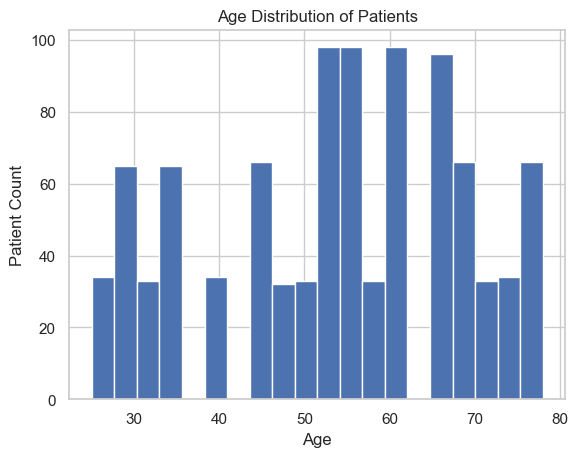

In [207]:
#Step 121: Age Distribution-patient demographic spread
plt.figure()
plt.hist(df["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Patient Count")
plt.title("Age Distribution of Patients")
plt.show()


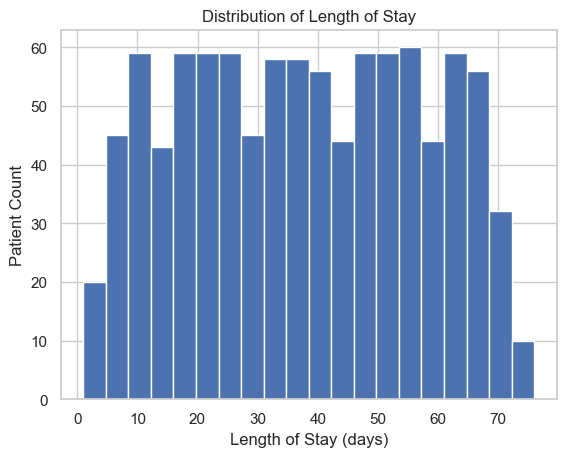

In [208]:
#Step 122: Length of Stay Distribution-Long right tail → inefficiency / complex cases
plt.figure()
plt.hist(df["length_of_stay"], bins=20)
plt.xlabel("Length of Stay (days)")
plt.ylabel("Patient Count")
plt.title("Distribution of Length of Stay")
plt.show()


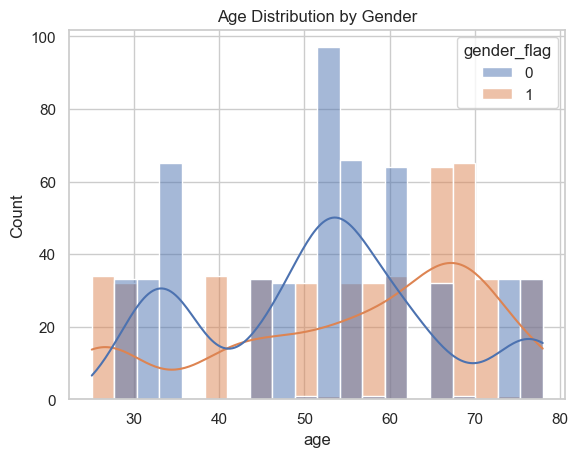

In [210]:
# Step 124: Age Distribution by Gender-Male vs Female age skew-Detects demographic bias
plt.figure()
sns.histplot(data=df, x="age", hue="gender_flag", bins=20, kde=True)
plt.title("Age Distribution by Gender")
plt.show()



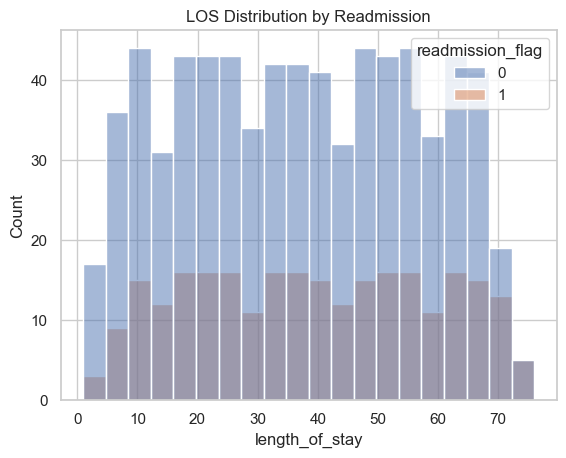

In [211]:
#Length of Stay by Readmission- Readmitted patients cluster at higher Length of stay
plt.figure()
sns.histplot(data=df, x="length_of_stay", hue="readmission_flag", bins=20)
plt.title("LOS Distribution by Readmission")
plt.show()


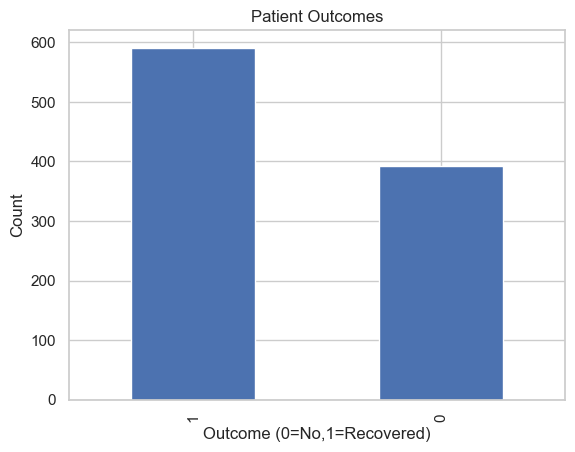

In [212]:
# Step 126: Outcome Count- Measures overall treatment success
plt.figure()
df["outcome_flag"].value_counts().plot(kind="bar")
plt.xlabel("Outcome (0=No,1=Recovered)")
plt.ylabel("Count")
plt.title("Patient Outcomes")
plt.show()


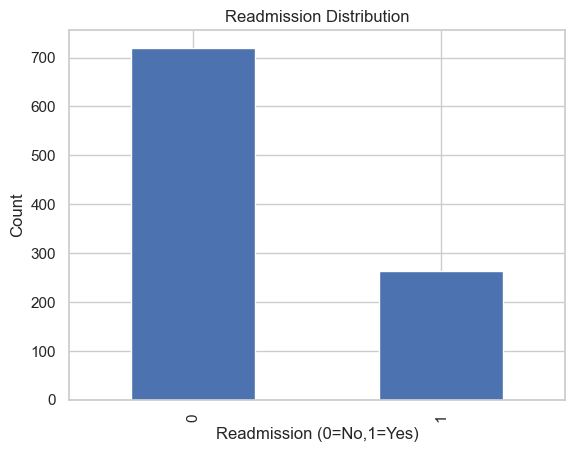

In [214]:
# Step 127: Readmission Count-High readmission = quality issue
plt.figure()
df["readmission_flag"].value_counts().plot(kind="bar")
plt.xlabel("Readmission (0=No,1=Yes)")
plt.ylabel("Count")
plt.title("Readmission Distribution")
plt.show()


<Figure size 640x480 with 0 Axes>

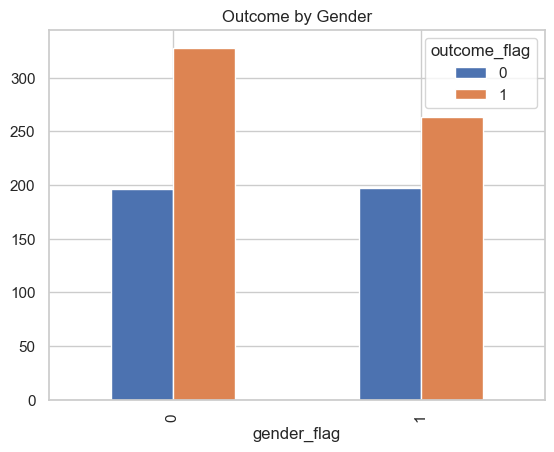

In [215]:
#Step 128: Outcome by Gender- Gender-based outcome disparity

plt.figure()
pd.crosstab(df["gender_flag"], df["outcome_flag"]).plot(kind="bar")
plt.title("Outcome by Gender")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_42256\748990840.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["readmission_flag"].mean().plot(kind="bar")


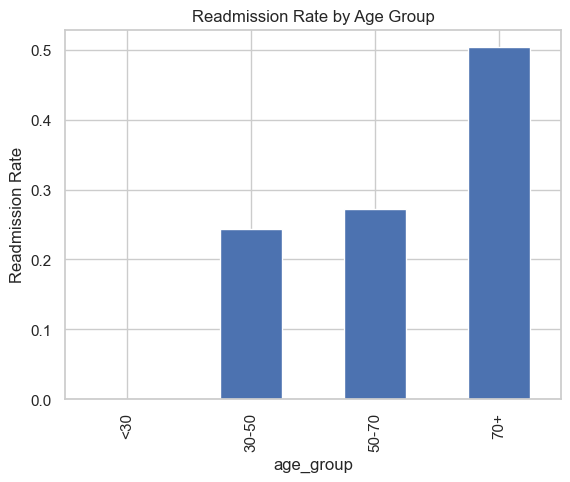

In [216]:
# Step 129: Readmission by Age Group-Elderly → higher risk

plt.figure()
df.groupby("age_group")["readmission_flag"].mean().plot(kind="bar")
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Age Group")
plt.show()


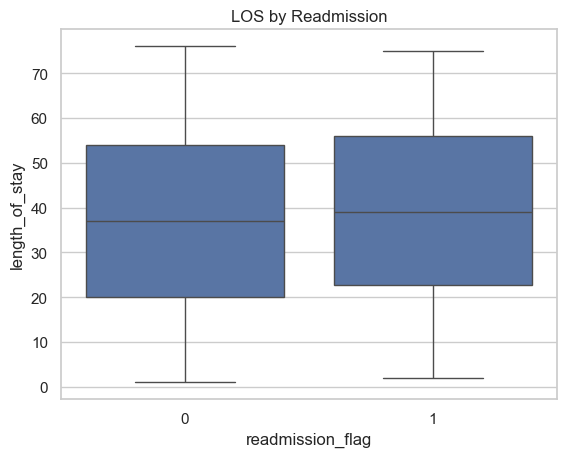

In [219]:
# Step 132: LOS by Readmission- Clear LOS difference → predictive factor
plt.figure()
sns.boxplot(x="readmission_flag", y="length_of_stay", data=df)
plt.title("LOS by Readmission")
plt.show()


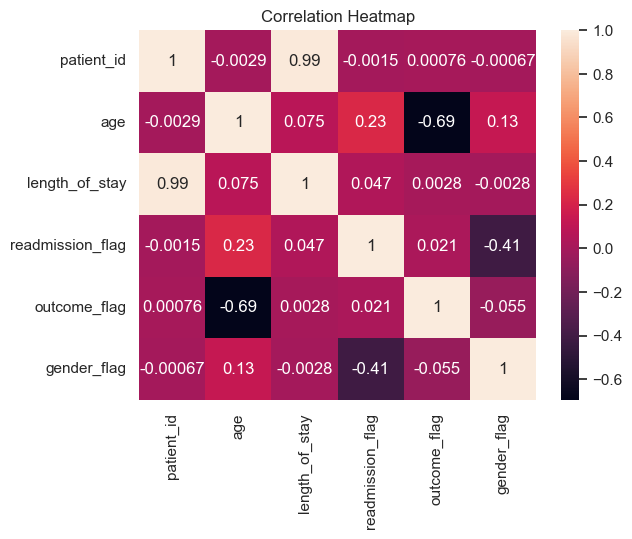

In [222]:
# Step 136: Correlation Heatmap-Strong LOS ↔ Cost correlation


plt.figure()
sns.heatmap(df.select_dtypes("number").corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [227]:
df

,patient_id,age,gender,length_of_stay,readmission,outcome,satisfaction,readmission_flag,outcome_flag,age_group,cost_tier,gender_flag,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke,cond_Allergic Reaction,cond_Appendicitis,cond_Cancer,cond_Childbirth,cond_Diabetes,cond_Fractured Arm,cond_Fractured Leg,cond_Heart Attack,cond_Heart Disease,cond_Hypertension,cond_Kidney Stones,cond_Osteoarthritis,cond_Prostate Cancer,cond_Respiratory Infection,cond_Stroke
0,1,45.0,F,5,No,Recovered,4,0,1,30-50,High,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,2,60.0,M,3,Yes,Stable,3,1,0,50-70,Low,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,3,32.0,F,1,No,Recovered,5,0,1,30-50,Low,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,4,75.0,M,7,Yes,Stable,2,1,0,70+,Medium,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,50.0,F,10,No,Recovered,4,0,1,30-50,High,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,996,68.0,M,70,No,Stable,4,0,0,50-70,Low,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
980,997,45.0,F,72,No,Recovered,3,0,1,30-50,Medium,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
981,998,40.0,M,72,No,Recovered,4,0,1,30-50,Medium,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
982,999,78.0,F,74,Yes,Stable,2,1,0,70+,High,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Fal

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\DELL\Downloads\hospital_data_analysis.csv")

print(df.columns)


Index(['Patient_ID', 'Age', 'Gender', 'Condition', 'Procedure', 'Cost',
       'Length_of_Stay', 'Readmission', 'Outcome', 'Satisfaction'],
      dtype='object')


In [231]:
# STEP 139: Cost vs Length of Stay- Patients with longer stays already appear to have higher costs.-Reducing unnecessary LOS can directly lower hospital expenses
print(df[["Length_of_Stay", "Cost"]].sample(5))


     Length_of_Stay   Cost
581              43   1000
60                7   2000
479              38   3000
265              22   4000
923              70  18000


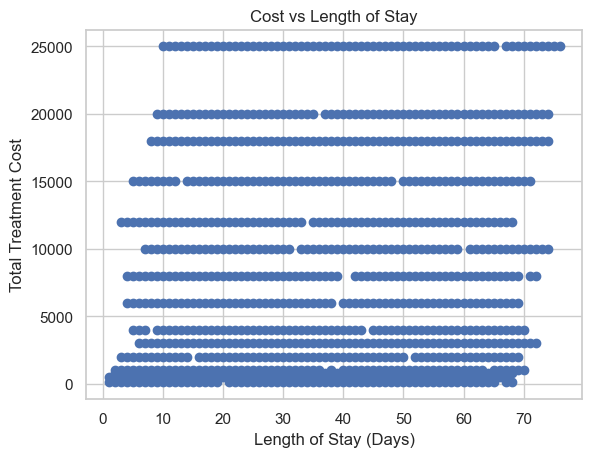

In [232]:
plt.scatter(df["Length_of_Stay"], df["Cost"])
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Total Treatment Cost")
plt.title("Cost vs Length of Stay")
plt.show()


In [233]:
print(
    "Correlation between Length_of_Stay and Cost:",
    df["Length_of_Stay"].corr(df["Cost"])
)


Correlation between Length_of_Stay and Cost: 0.11420619450638143


In [234]:
# STEP 140: Age vs Cost- Older patients often have higher costs, but not always
print(df[["Age", "Cost"]].sample(5))


     Age   Cost
787   72   1000
588   35  12000
701   45   3000
498   67  20000
539   78  18000


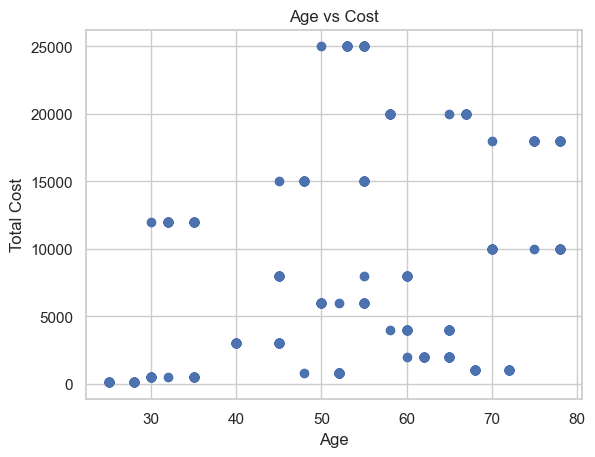

In [235]:
plt.scatter(df["Age"], df["Cost"])
plt.xlabel("Age")
plt.ylabel("Total Cost")
plt.title("Age vs Cost")
plt.show()


In [236]:
print(
    "Correlation between Age and Cost:",
    df["Age"].corr(df["Cost"])
)


Correlation between Age and Cost: 0.3038157871404077


In [237]:
# STEP 141: Age vs Length of Stay- Older patients typically take longer to recover.- Length of stay generally increases with age.
print(df[["Age", "Length_of_Stay"]].sample(5))


     Age  Length_of_Stay
601   58              49
154   45              14
530   60              40
817   72              59
632   32              45


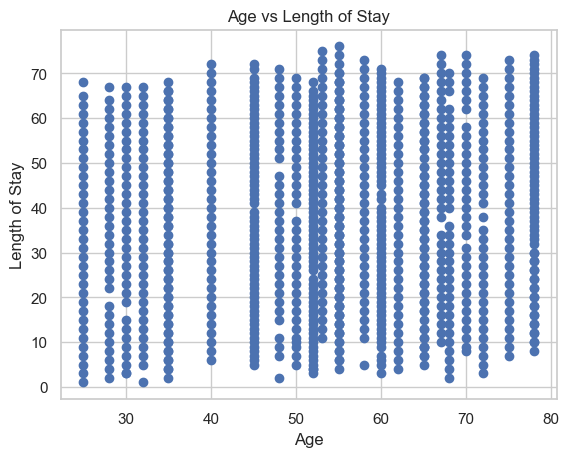

In [238]:
plt.scatter(df["Age"], df["Length_of_Stay"])
plt.xlabel("Age")
plt.ylabel("Length of Stay")
plt.title("Age vs Length of Stay")
plt.show()


In [239]:
print(
    "Correlation between Age and Length_of_Stay:",
    df["Age"].corr(df["Length_of_Stay"])
)


Correlation between Age and Length_of_Stay: 0.07508035412235967


In [240]:
# STEP 142: Cost per Day vs Length of Stay-Cost per day decreases as stay length increases.
df["Cost_per_Day"] = df["Cost"] / df["Length_of_Stay"]


In [241]:
print(df[["Length_of_Stay", "Cost_per_Day"]].sample(5))


     Length_of_Stay  Cost_per_Day
142              10     10.000000
968              67      1.492537
390              30    266.666667
774              58     51.724138
352              27    222.222222


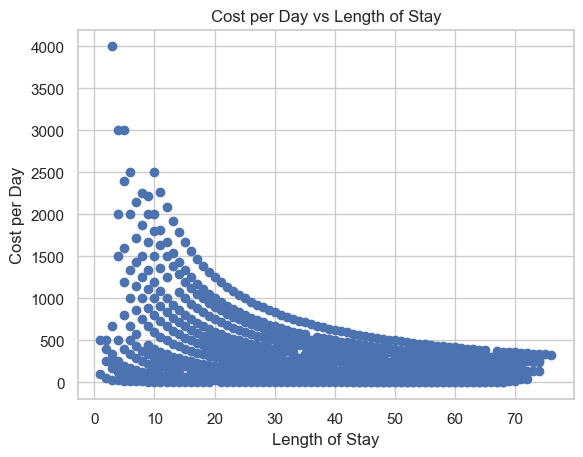

In [243]:
plt.scatter(df["Length_of_Stay"], df["Cost_per_Day"])
plt.xlabel("Length of Stay")
plt.ylabel("Cost per Day")
plt.title("Cost per Day vs Length of Stay")
plt.show()


In [244]:
print(
    "Correlation between Cost and Satisfaction:",
    df["Cost"].corr(df["Satisfaction"])
)


Correlation between Cost and Satisfaction: -0.46965804486687296


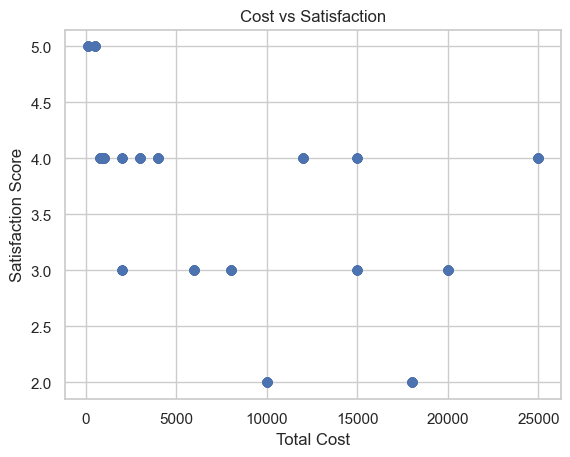

In [245]:
plt.scatter(df["Cost"], df["Satisfaction"])
plt.xlabel("Total Cost")
plt.ylabel("Satisfaction Score")
plt.title("Cost vs Satisfaction")
plt.show()
